# Suv_dataset prediction

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('suv_data.csv')

In [3]:
df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [4]:
df.groupby ('Purchased').size()

Purchased
0    257
1    143
dtype: int64

In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


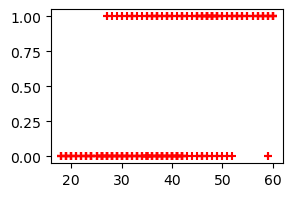

In [6]:
plt.figure(figsize=(3,2))
plt.scatter(df.Age,df.Purchased, marker='+',color='red')
plt.show()


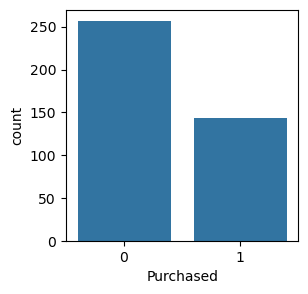

In [24]:
plt.figure(figsize=(3,3))
sns.countplot (x = 'Purchased', data = df)
plt.show()

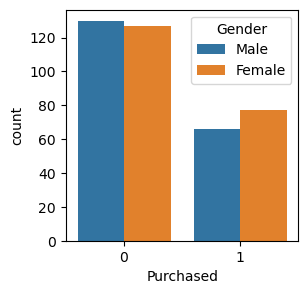

In [23]:
plt.figure(figsize=(3,3))
sns.countplot ( x = 'Purchased', hue = 'Gender', data = df)
plt.show()

In [9]:
X=df.iloc[:,[2,3]].values
y=df.iloc[:,4].values

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.25,random_state=0)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [14]:
from sklearn.linear_model import LogisticRegression 

In [15]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [16]:
y_pred=model.predict(X_test)


In [17]:
model.score(X_test,y_test)

0.89

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
print (confusion_matrix (y_test,y_pred))

[[65  3]
 [ 8 24]]


In [20]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)